# CNN

In [144]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

#### 像素点的理解

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


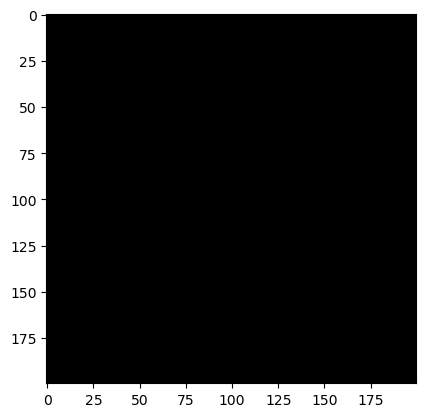

In [7]:
# 构建200*200 像素值全是0的图像 
img = np.zeros((200,200))
print(img)
# 看图像
plt.imshow(img,cmap='gray',vmin=0, vmax=255)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


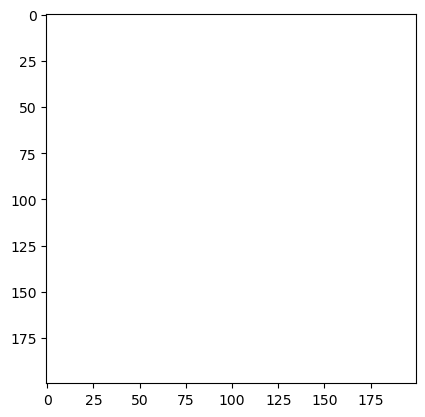

In [86]:
# 构建200*200 像素值全是255的图像 
img = np.full((200,200), 255)
print(img)
# 看图像
plt.imshow(img,cmap='gray',vmin=0, vmax=255)

### 图像通道

(1920, 1080, 3)


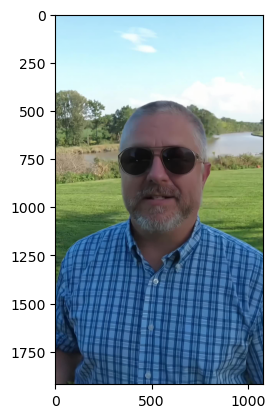

^原图^-^原图^-^原图^-^原图^-^原图^-^原图^-^原图^-^原图^-^原图^-^原图^-
(1920, 1080, 4)


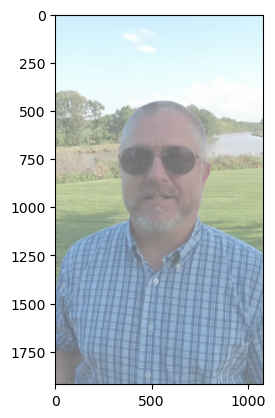

^加通道^-^加通道^-^加通道^-^加通道^-^加通道^-^加通道^-^加通道^-^加通道^-^加通道^-^加通道^-
(4, 1920, 1080)
[[174 174 174 ... 183 183 183]
 [174 174 174 ... 183 183 183]
 [174 174 174 ... 183 183 183]
 ...
 [ 90  90  90 ...  36  34  34]
 [ 90  90  90 ...  38  37  34]
 [ 90  90  90 ...  40  39  35]]


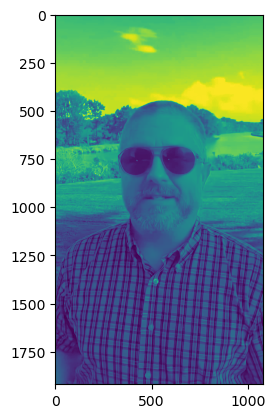

--------------------------------------------------
[[226 226 226 ... 231 231 231]
 [226 226 226 ... 231 231 231]
 [226 226 226 ... 231 231 231]
 ...
 [ 79  79  79 ...  64  62  62]
 [ 79  79  79 ...  66  65  62]
 [ 79  79  79 ...  68  67  63]]


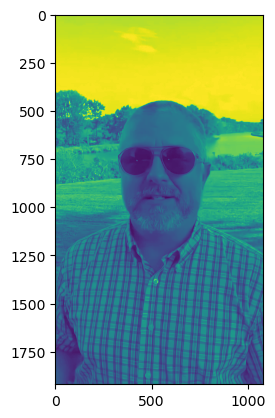

--------------------------------------------------
[[248 248 248 ... 251 251 251]
 [248 248 248 ... 251 251 251]
 [248 248 248 ... 251 251 251]
 ...
 [ 83  83  83 ... 101  99  99]
 [ 83  83  83 ... 103 102  99]
 [ 83  83  83 ... 105 104 100]]


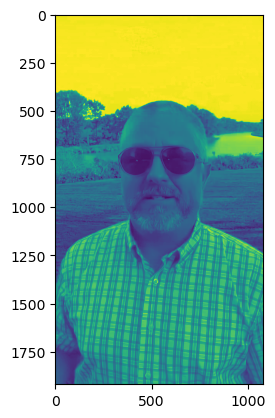

--------------------------------------------------
[[150 150 150 ... 150 150 150]
 [150 150 150 ... 150 150 150]
 [150 150 150 ... 150 150 150]
 ...
 [150 150 150 ... 150 150 150]
 [150 150 150 ... 150 150 150]
 [150 150 150 ... 150 150 150]]


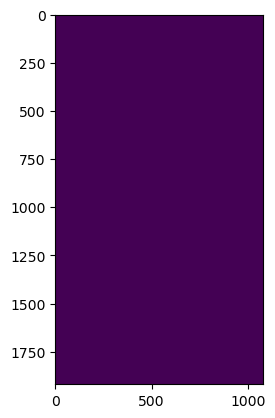

--------------------------------------------------
####################################################################################################


In [136]:
img = plt.imread('./data/original.jpg')
print(img.shape) # (1920, 1080, 3) ->  h,w,channel
plt.imshow(img)
plt.show()
print('^原图^-'*10)


# 给图像加个透明度通道
b = np.full((1920,1080,1), 150)
img = np.c_[img, b] #加1列，加个透明通道
print(img.shape)
plt.imshow(img)
plt.show()
print('^加通道^-'*10)


# 调整通道数字到最前面  (1920, 1080, 3) -> (3, 1920, 1080)
img = np.transpose(img, (2,0,1)) # 2表示原来的第2个维度;  0表示原来的第0维度;  1表示原来的第1个维度
print(img.shape)

# 查看各个通道值
for channel in img:
    print(channel)
    plt.imshow(channel)
    plt.show()
    print('-'*50)

print('#'*100)

(4, 1920, 1080)
(1920, 1080, 4)


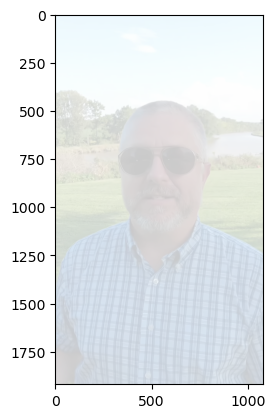

In [142]:
# 修改透明通道值
img[3] = 55
print(img.shape)

# 显示图像，图像显示需要 (h,w,c)的形状
img4 = np.transpose(img,(1,2,0))
print(img4.shape)
plt.imshow(img4)
plt.show()

### 卷积层使用

#### 1.单个卷积核


(1920, 1080, 3)
卷积核形状 torch.Size([1, 3, 3, 3])
初始卷积核 Parameter containing:
tensor([[[[-0.0120, -0.1557, -0.0419],
          [ 0.0398,  0.0843, -0.0927],
          [ 0.1208, -0.0838, -0.1347]],

         [[ 0.0817, -0.0019, -0.1913],
          [ 0.1248, -0.1071, -0.1465],
          [ 0.1735, -0.0439,  0.1019]],

         [[ 0.1391, -0.1553,  0.0408],
          [ 0.1580, -0.1836,  0.1724],
          [ 0.0288,  0.0952,  0.1704]]]], requires_grad=True)
指定卷积核 Parameter containing:
tensor([[[[-1., -1., -1.],
          [-1., -1., -1.],
          [-1., -1., -1.]],

         [[-1., -1., -1.],
          [-1., -1., -1.],
          [-1., -1., -1.]],

         [[-1., -1., -1.],
          [-1., -1., -1.],
          [-1., -1., -1.]]]], requires_grad=True)
torch.Size([3, 1920, 1080])
torch.Size([1, 3, 1920, 1080])
torch.Size([1, 1, 1920, 1080])


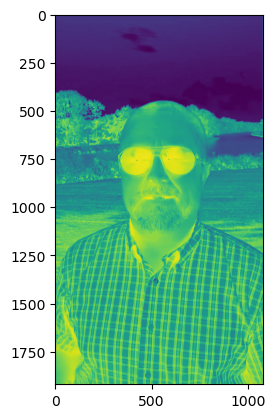

In [205]:
def test01():
    # 读图像
    img = plt.imread('./data/original.jpg')
    print(img.shape)
    
    # 创建卷积核
    conv2d = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=3, stride=1, padding=1)
    print('卷积核形状',conv2d.weight.shape)
    print('初始卷积核',conv2d.weight)
    
    # 指定卷积核, 值为-1
    kernel = np.full((1,3,3,3), -1)
    conv2d.weight.data = torch.Tensor(kernel)
    print('指定卷积核',conv2d.weight)

    
    # 卷积层对输入数据形状要求 (batch, channel, h, w)
    # 把(h,w,c) -> (c, h, w)
    img = torch.tensor(img).permute(2,0,1)
    print(img.shape)
    
    # 数据再增加一个批次维度
    # (c,h,w) -> (b,c,h,w)
    new_img = img.unsqueeze(0) #在第0个维度钱增加一个维度
    new_img = new_img.type(torch.FloatTensor)
    print(new_img.shape)
    
    # 数据放入卷积层计算
    new_img = conv2d(new_img)
    print(new_img.shape)
    
    # 显示图像
    # 将(b,c,h,w) -> (c,h,w)  先去掉批次
    new_img = new_img.squeeze(0)
    # 再把通道位置变最后 (c,h,w) -> (h,w,c)
    new_img = new_img.permute(1,2,0)
    # 显示图像
    # new_img剥离原张量，然后再放入imshow(), 避免影响梯度
    plt.imshow(new_img.detach())
    plt.show()

    
test01()   
    

### 2.多个卷积核


(1920, 1080, 3)
卷积核形状 torch.Size([4, 3, 3, 3])
初始卷积核 Parameter containing:
tensor([[[[-0.1780,  0.1173, -0.0580],
          [-0.0310,  0.1865, -0.1576],
          [ 0.0093,  0.1143, -0.1576]],

         [[ 0.1618, -0.1420, -0.0719],
          [ 0.1196, -0.1704,  0.1407],
          [ 0.0959,  0.0313,  0.0312]],

         [[-0.0971,  0.0030, -0.0121],
          [-0.1321, -0.1516, -0.0428],
          [-0.1088, -0.1906, -0.0500]]],


        [[[-0.1558,  0.0692,  0.0576],
          [-0.0419, -0.1029, -0.1479],
          [ 0.0827, -0.1377,  0.0513]],

         [[ 0.0407,  0.0737,  0.1410],
          [-0.1755, -0.0032,  0.1188],
          [ 0.0859, -0.0034, -0.1807]],

         [[ 0.1491, -0.0704, -0.1051],
          [ 0.0166,  0.1180,  0.0562],
          [ 0.1071,  0.0202, -0.0780]]],


        [[[ 0.0777,  0.1644, -0.0910],
          [-0.1281,  0.0184, -0.0683],
          [-0.0633, -0.1456, -0.0330]],

         [[ 0.0288, -0.0986,  0.0021],
          [-0.0305,  0.0472, -0.1918],
          

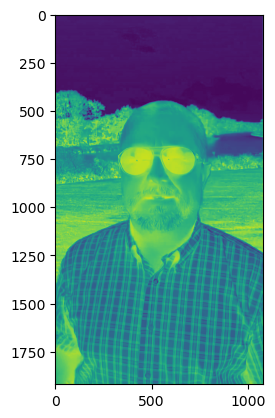

第2个特征图 torch.Size([1920, 1080, 1])


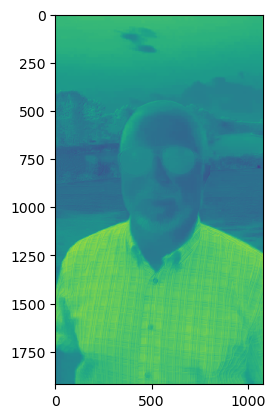

第3个特征图 torch.Size([1920, 1080, 1])


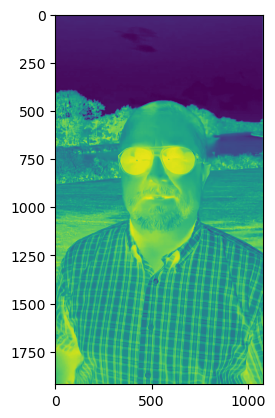

第4个特征图 torch.Size([1920, 1080, 1])


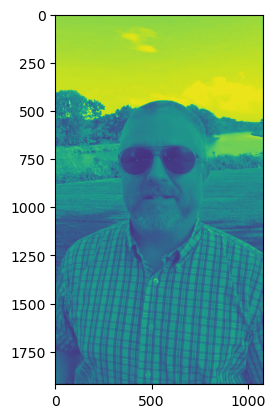

In [211]:
def test02():
    # 读图像
    img = plt.imread('./data/original.jpg')
    print(img.shape)
    
    # 创建卷积核
    conv2d = nn.Conv2d(in_channels=3, out_channels=4, kernel_size=3, stride=1, padding=1)
    print('卷积核形状',conv2d.weight.shape)
    print('初始卷积核',conv2d.weight)
    
#     # 指定卷积核, 值为-1
#     kernel = np.full((4,3,3,3), 0.0789)
#     conv2d.weight.data = torch.Tensor(kernel)
#     print('指定卷积核',conv2d.weight)
    
    
    # 卷积层对输入数据形状要求 (batch, channel, h, w)
    # 把(h,w,c) -> (c, h, w)
    img = torch.tensor(img).permute(2,0,1)
    print(img.shape)
    
    # 数据再增加一个批次维度
    # (c,h,w) -> (b,c,h,w)
    new_img = img.unsqueeze(0) #在第0个维度钱增加一个维度
    new_img = new_img.type(torch.FloatTensor)
    print(new_img.shape)
    
    # 数据放入卷积层计算
    new_img = conv2d(new_img)
    print('卷积后形状->',new_img.shape)
    
    # 显示图像
    # 将(b,c,h,w) -> (c,h,w)  先去掉批次
    new_img = new_img.squeeze(0)
    # 再把通道位置变最后 (c,h,w) -> (h,w,c)
    new_img = new_img.permute(1,2,0)
    print(new_img.shape)
   
    # 显示图像
    # new_img剥离原张量，然后再放入imshow()
    new_img = new_img.detach()
    
    # 显示第一个特征图
    new_img1 = new_img[:,:,0].unsqueeze(2)
    print('第一个特征图',new_img1.shape)
    plt.imshow(new_img1)
    plt.show()

    # 显示第2个特征图
    new_img1 = new_img[:,:,1].unsqueeze(2)
    print('第2个特征图',new_img1.shape)
    plt.imshow(new_img1)
    plt.show()
    
    # 显示第3个特征图
    new_img1 = new_img[:,:,2].unsqueeze(2)
    print('第3个特征图',new_img1.shape)
    plt.imshow(new_img1)
    plt.show()
    
    # 显示第4个特征图
    new_img1 = new_img[:,:,3].unsqueeze(2)
    print('第4个特征图',new_img1.shape)
    plt.imshow(new_img1)
    plt.show()

    
test02()   

### CIFAR10数据集

In [238]:
from torchvision import datasets,transforms
from torchvision.transforms import Compose 
from torch.utils.data import DataLoader

# 数据基本信息
def test01():
    train_dataset = datasets.CIFAR10(root='/Users/mashunfeng/Desktop/dataset', #下载到的目录
                              train=True, #下载训练数据
                              transform = transforms.ToTensor(), #数据转成tensor类型
                              download=False) #下载 True表示下载
    # 下载测试集
    test_dataset = datasets.CIFAR10(root='/Users/mashunfeng/Desktop/dataset', #下载到的目录
                              train=False, #False表示下载测试数据
                              transform = Compose([transforms.ToTensor()]), #数据转成tensor类型
                              download=False) #下载
    
    #数据集数量
    print('训练集大小', len(train_dataset.targets))
    print('测试集大小', len(test_dataset.targets))
    
    #数据形状
    print('数据形状', train_dataset.data.shape)
    
    #数据类别
    print('类别',train_dataset.class_to_idx)
    
test01()


训练集大小 50000
测试集大小 10000
数据形状 (50000, 32, 32, 3)
类别 {'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}


In [261]:
# 数据加载器
def test02():
    train_dataset = datasets.CIFAR10(root='/Users/mashunfeng/Desktop/dataset', #下载到的目录
                              train=True,
                              transform = transforms.ToTensor())
        
    dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
    
    for x,y in dataloader:
        print('训练样本',x.shape)
        print('样本目标值',y)
        break
        
test02()

训练样本 torch.Size([8, 3, 32, 32])
样本目标值 tensor([0, 4, 7, 0, 2, 5, 6, 7])


In [278]:
## 定义模型
import torch.nn.functional as F
import torch
import time

class ImageClassModel(nn.Module):
    def __init__(self):
        super(ImageClassModel, self).__init__()
        
        # 定义卷积池化
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, stride=1, kernel_size=3)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, stride=1, kernel_size=3)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # 定义线性层
        self.linear1 = nn.Linear(64*6*6, 120)
        self.linear2 = nn.Linear(120,84)
        self.out = nn.Linear(84,10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool2(x)
        
        # 所有批次数据拍平
        x = x.view(x.size(0),-1)
        
        x = self.linear1(x)
        x = F.relu(x)
        
        x = self.linear2(x)
        x = F.relu(x)
        
        return self.out(x)
     
        
def train():
    # 
    train_dataset = datasets.CIFAR10(root='/Users/mashunfeng/Desktop/dataset', #下载到的目录
                              train=True,
                              transform = transforms.ToTensor(),
                              download=True)
    # 模型
    model = ImageClassModel()
    #### 加载训练好的模型
    # model.load_state_dict(torch.load('model/image_class.pth'))
    
    # 损失函数
    loss_fun = nn.CrossEntropyLoss()
    # 优化器
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    # 训练次数
    epochs = 1
    
    
    for epoch_idx in range(epochs):
        dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
        
        # 样本数量
        sam_num = 0
        #
        total_loss = 0
        
        #开始时间
        start = time.time()
        # 正确个数
        correct = 0
        
        for x,y in dataloader:
            
            output = model(x)
            # 计算损失
            loss = loss_fun(output, y)
            #
            optimizer.zero_grad()
            # 计算梯度
            loss.backward()
            # 更新参数
            optimizer.step()
            
            # 统计信息
            correct += (torch.argmax(output, dim=-1) == y).sum()
            total_loss += loss.item()
            sam_num += len(y)
        
        print('epoch:',epoch_idx, 
              ' loss:', total_loss/sam_num, 
              ' acc:', correct/sam_num, 
              ' time:',time.time()-start)
    
    ## 模型保存
    torch.save(model.state_dict(), 'model/image_class.pth')

# 训练
train()


Files already downloaded and verified
epoch: 0  loss: 0.04770186542749405  acc: tensor(0.4408)  time: 49.84604096412659


In [274]:
## 预测函数
def test():
    # 下载测试集
    test_dataset = datasets.CIFAR10(root='/Users/mashunfeng/Desktop/dataset', #下载到的目录
                              train=False, #False表示下载测试数据
                              transform = Compose([transforms.ToTensor()]), #数据转成tensor类型
                              download=False) #下载
    dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    # 加载训练好的模型
    model = ImageClassModel()
    model.load_state_dict(torch.load('model/image_class.pth'))
    
    # 切换模型为预测状态
    model.eval()
    
    total_correct = 0
    total_samples = 0
    
    for x,y in dataloader:
        output = model(x)
        
        # 统计预测正确的样本数量
        total_correct += (torch.argmax(output, dim=-1) ==y).sum()
        total_samples += len(y)
        
    #打印样本准确率
    print('acc:', total_correct/total_samples)
    
test()

acc: tensor(0.5984)
